In [ ]:
import pip
pip.main(['install', 'pandas'])
pip.main(['install', 'matplotlib'])
pip.main(['install', 'seaborn'])
pip.main(['install', 'scikit-learn'])
!pip.main(['install', 'nbmerge'])
pip.main(['install', 'nbformat'])
!pip install nbformat ipynb-py-convert

# CHARGEMENT DES BIBLIOTHEQUES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

 Chargement du jeu de données "LIGNES_TICKET_V4"

In [3]:
dataset_path = "C:\\Users\\belga\\OneDrive\\Bureau\\EMBA Big Data\\Module Datascience\\Projet Data Science S2 2024\\LIGNES_TICKET_V4.csv"
data3 = pd.read_csv(dataset_path, sep='|', low_memory=False)
print(data3.shape)
print(list(data3.columns))


(34105705, 7)
['IDTICKET', 'NUMLIGNETICKET', 'IDARTICLE', 'QUANTITE', 'MONTANTREMISE', 'TOTAL', 'MARGESORTIE']


La ligne de code ci-dessous nous permet de voir le détail des colonnes de notre jeu de données ainsi que le type de données (chaîne de caractères, numérique)

In [4]:
print(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34105705 entries, 0 to 34105704
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   IDTICKET        int64 
 1   NUMLIGNETICKET  int64 
 2   IDARTICLE       object
 3   QUANTITE        object
 4   MONTANTREMISE   object
 5   TOTAL           object
 6   MARGESORTIE     object
dtypes: int64(2), object(5)
memory usage: 1.8+ GB
None


Aperçu du jeu de données.

In [5]:
data3.head(10)

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
0,190400316260,2,246208,"1,000",",000","4,96","2,37"
1,190400316262,2,33725,"1,000",",000","8,25","3,63"
2,190400316262,3,634497,"1,000",",000","5,79","3,63"
3,190400316262,1,257613,"1,000",",000","18,29","6,21"
4,190400316263,1,257627,"1,000",",000","49,92","10,42"
5,190400316265,1,320054,"1,000",",000","6,42",",67"
6,190400316265,3,835984,"1,000",",000","37,42","13,78"
7,190400316265,2,290491,"1,000",",000","5,42","4,22"
8,190400316270,6,932088,"1,000",",000","6,25","6,25"
9,190400316270,4,165207,"3,000","2,250","20,22","10,29"


In [6]:
data3.tail(10)

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
34105695,340200383182,4,36771,1,0,"7,46","5,81"
34105696,340200383182,5,179749,2,0,"14,92","8,78"
34105697,340200383182,6,699430,3,0,"19,87","13,75"
34105698,340200383182,7,784813,1,0,"8,29","5,32"
34105699,340200383203,1,257645,1,0,"4,69","1,84"
34105700,340200383203,2,257643,1,0,"4,69","1,83"
34105701,340200383203,3,50170,1,0,"3,18",1
34105702,340200383203,4,349345,1,0,"3,46","1,13"
34105703,340200383203,5,250580,2,0,"6,8","2,18"
34105704,340200383217,1,816313,20,"1,818","1,82","1,42"


 Afin d'exploiter de façon optimale les informations, nous allons convetir les l'ID TICKET et le NUM LIGNE TICKET en caractère. A l'inverse, nous devons convertir les quantités, les montants, les totaux et les marges en valeur numérique.

In [7]:
data3['IDTICKET'] = data3['IDTICKET'].astype(str)
data3['NUMLIGNETICKET'] = data3['NUMLIGNETICKET'].astype(str)

In [8]:
data3["QUANTITE"]=data3['QUANTITE'].str.replace(',', '.').astype(float)

In [9]:
data3["TOTAL"]=data3['TOTAL'].str.replace(',', '.').astype(float)

In [10]:
data3["MONTANTREMISE"]=data3['MONTANTREMISE'].str.replace(',', '.').astype(float)

In [11]:
data3["MARGESORTIE"]=data3['MARGESORTIE'].str.replace(',', '.').astype(float)

Vérification du traitement.

In [12]:
print(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34105705 entries, 0 to 34105704
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   IDTICKET        object 
 1   NUMLIGNETICKET  object 
 2   IDARTICLE       object 
 3   QUANTITE        float64
 4   MONTANTREMISE   float64
 5   TOTAL           float64
 6   MARGESORTIE     float64
dtypes: float64(4), object(3)
memory usage: 1.8+ GB
None


In [13]:
data3['QUANTITE'].min()

-155.0

In [14]:
data3

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
0,190400316260,2,246208,1.0,0.000,4.96,2.37
1,190400316262,2,33725,1.0,0.000,8.25,3.63
2,190400316262,3,634497,1.0,0.000,5.79,3.63
3,190400316262,1,257613,1.0,0.000,18.29,6.21
4,190400316263,1,257627,1.0,0.000,49.92,10.42
...,...,...,...,...,...,...,...
34105700,340200383203,2,257643,1.0,0.000,4.69,1.83
34105701,340200383203,3,50170,1.0,0.000,3.18,1.00
34105702,340200383203,4,349345,1.0,0.000,3.46,1.13
34105703,340200383203,5,250580,2.0,0.000,6.80,2.18


In [15]:
# Création de la variable 'TOP_RETOUR' basée sur la colonne 'QUANTITE'
data3['TOP_RETOUR'] = np.where(data3['QUANTITE'] < 0, 1, 0)

# Afficher le DataFrame avec la nouvelle variable 'TOP_RETOUR'
print(data3)

              IDTICKET NUMLIGNETICKET IDARTICLE  QUANTITE  MONTANTREMISE  \
0         190400316260              2    246208       1.0          0.000   
1         190400316262              2     33725       1.0          0.000   
2         190400316262              3    634497       1.0          0.000   
3         190400316262              1    257613       1.0          0.000   
4         190400316263              1    257627       1.0          0.000   
...                ...            ...       ...       ...            ...   
34105700  340200383203              2    257643       1.0          0.000   
34105701  340200383203              3     50170       1.0          0.000   
34105702  340200383203              4    349345       1.0          0.000   
34105703  340200383203              5    250580       2.0          0.000   
34105704  340200383217              1    816313      20.0          1.818   

          TOTAL  MARGESORTIE  TOP_RETOUR  
0          4.96         2.37           0  
1

In [16]:
data3['TOP_RETOUR'].value_counts()

TOP_RETOUR
0    34003892
1      101813
Name: count, dtype: int64

In [17]:
# Calcul de la nouvelle variable 'SOLDE_QTE' en regroupant par 'IDTICKET'
data_grouped = data3.groupby('IDTICKET').agg({
    'TOP_RETOUR': 'max',
    'QUANTITE': 'sum'
})


In [18]:
data_grouped

,TOP_RETOUR,QUANTITE
IDTICKET,,
1000100553129,0,7.365
1000100553131,0,5.976
1000100553133,0,9.309
1000100553134,1,1.000
1000100553139,0,2.000
...,...,...
990600196600,0,16.737
990600196602,0,36.090
990600196607,0,12.000


In [19]:
columns=['MONTANTREMISE', 'TOTAL', 'MARGESORTIE']
data4=data3[columns]
data4[columns].shape

(34105705, 3)

In [21]:
data4.describe()

,MONTANTREMISE,TOTAL,MARGESORTIE
count,3.410570e+07,3.410570e+07,3.410570e+07
mean,9.912670e-01,9.937605e+00,4.224984e+00
std,6.086740e+00,2.426155e+01,1.166608e+01
min,-4.269420e+02,-1.500000e+04,-1.500000e+04
25%,0.000000e+00,2.820000e+00,9.900000e-01
50%,0.000000e+00,5.210000e+00,2.260000e+00
75%,4.730000e-01,1.050000e+01,5.210000e+00
max,1.316667e+04,1.500000e+04,1.500000e+04


In [22]:
data4[columns].max()

MONTANTREMISE    13166.667
TOTAL            15000.000
MARGESORTIE      15000.000
dtype: float64

Il convient à présent de vérifier la présence de valeur aberrantes.

In [23]:
def boxplot(data3):
    plt.figure(figsize=(16, 6))
    sns.boxplot(data=data4)
    plt.grid()


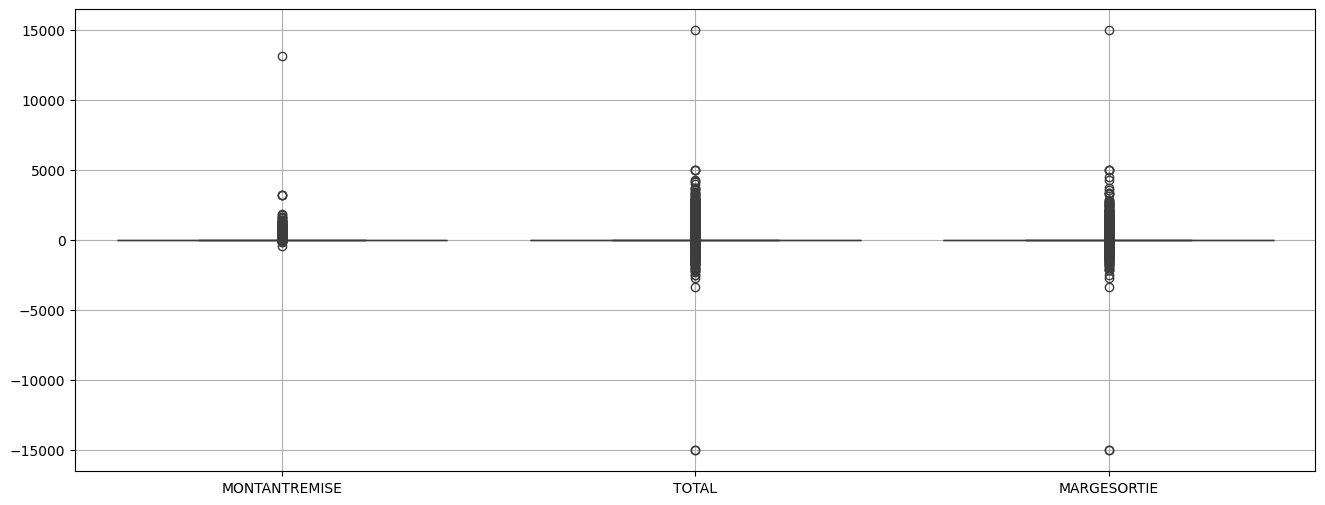

In [24]:
boxplot(data4)

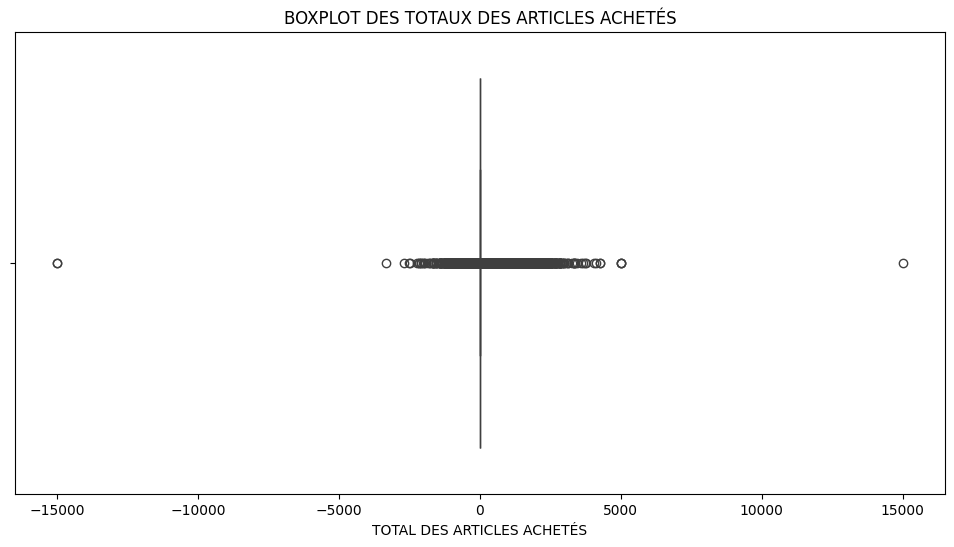

In [25]:
# Visualiser les outliers en utilisant un boxplot avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data4, x='TOTAL')
plt.xlabel('TOTAL DES ARTICLES ACHETÉS')
plt.title("BOXPLOT DES TOTAUX DES ARTICLES ACHETÉS")
plt.show()

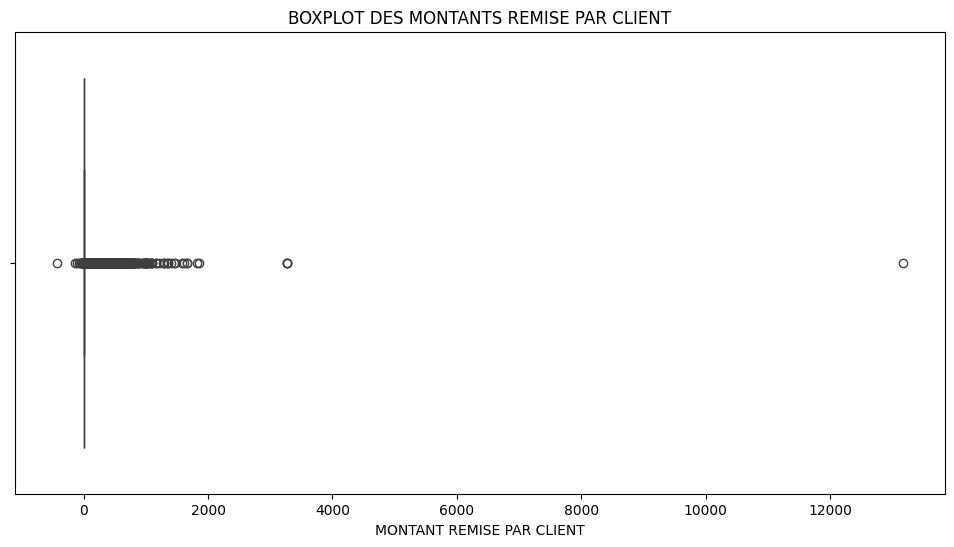

In [26]:
# Visualiser les outliers en utilisant un boxplot avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data4, x='MONTANTREMISE')
plt.xlabel('MONTANT REMISE PAR CLIENT')
plt.title("BOXPLOT DES MONTANTS REMISE PAR CLIENT")
plt.show()

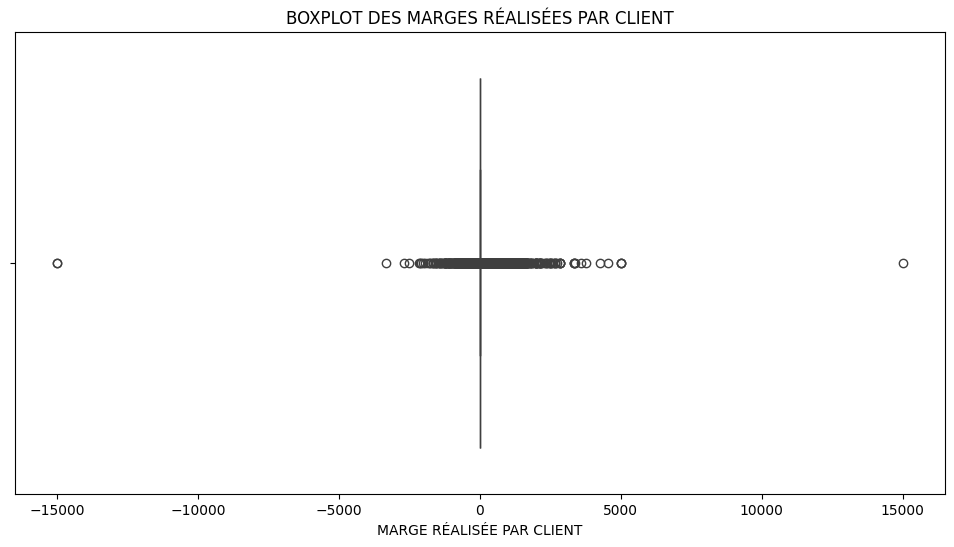

In [27]:
# Visualiser les outliers en utilisant un boxplot avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data4, x='MARGESORTIE')
plt.xlabel('MARGE RÉALISÉE PAR CLIENT')
plt.title("BOXPLOT DES MARGES RÉALISÉES PAR CLIENT")
plt.show()

In [28]:
from pandas.api.types import is_numeric_dtype
columns=['MONTANTREMISE', 'TOTAL', 'MARGESORTIE']
data4=data3[columns]
# Fonction pour détecter les outliers en utilisant l'IQR
def detect_outliers_iqr(data4, columns):
    Q1 = data4[columns].quantile(0.25)
    Q3 = data4[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data4[(data4[columns] < lower_bound) | (data4[columns] > upper_bound)]
    return outliers

# Boucler à travers les colonnes numériques pour détecter les outliers
for col in data4.columns:
    if is_numeric_dtype(data3[col]):
        outliers = detect_outliers_iqr(data4, col)
        if len(outliers) > 0:
            print(f"Outliers détectés dans la colonne '{col}':")
            print(outliers)

Outliers détectés dans la colonne 'MONTANTREMISE':
          MONTANTREMISE   TOTAL  MARGESORTIE
9                 2.250   20.22        10.29
10                1.483   13.39         7.09
13                1.208   10.87         5.74
44               32.500  132.50        38.38
45               10.836   18.16         3.96
...                 ...     ...          ...
34105666         12.500   57.92        28.42
34105672          2.458    0.83        -0.68
34105682          6.545    6.55         5.11
34105684          4.545   18.14         7.19
34105704          1.818    1.82         1.42

[5073982 rows x 3 columns]
Outliers détectés dans la colonne 'TOTAL':
          MONTANTREMISE  TOTAL  MARGESORTIE
4                   0.0  49.92        10.42
6                   0.0  37.42        13.78
26                  0.0  24.58        12.39
34                  0.0  35.45        14.50
38                  0.0  23.54        13.68
...                 ...    ...          ...
34105669            0.0  54.08

In [29]:
from pandas.api.types import is_numeric_dtype
columns=['MONTANTREMISE', 'TOTAL', 'MARGESORTIE']
data4=data3[columns]
# Fonction pour imputer les outliers 
def impute_outliers(data4, columns):
    Q1 = np.percentile(data4[columns],25)
    Q3 = np.percentile(data4[columns],75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data4.loc[data4[columns] < lower_bound, columns] = lower_bound 
    data4.loc[data4[columns] > upper_bound,columns]=upper_bound
for columns in columns:
    impute_outliers(data4,columns)

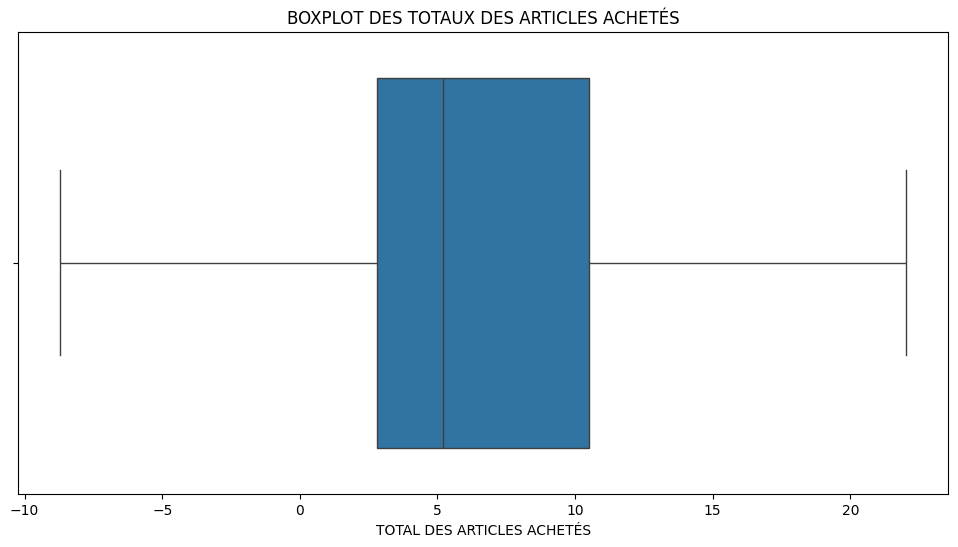

In [30]:
# Visualiser les outliers en utilisant un boxplot avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data4, x='TOTAL')
plt.xlabel('TOTAL DES ARTICLES ACHETÉS')
plt.title("BOXPLOT DES TOTAUX DES ARTICLES ACHETÉS")
plt.show()

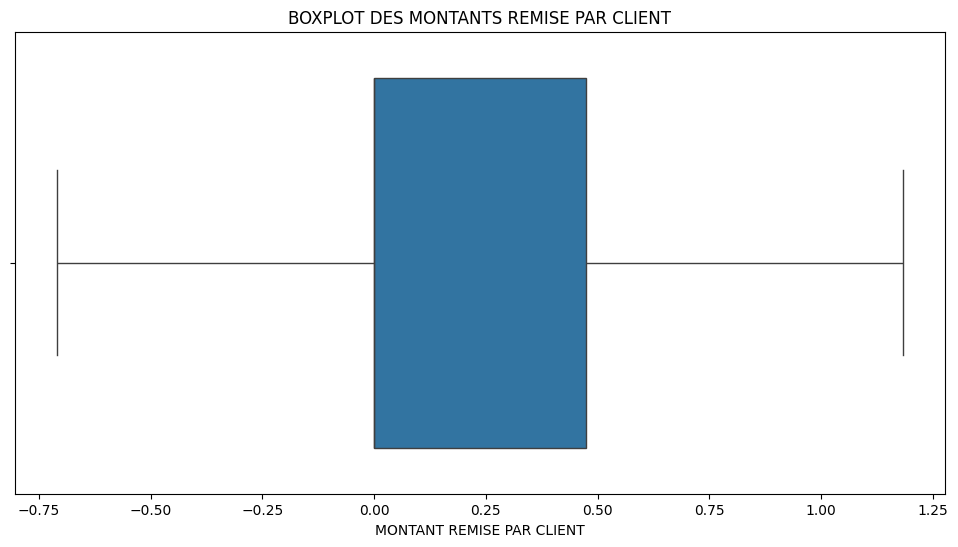

In [31]:
# Visualiser les outliers en utilisant un boxplot avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data4, x='MONTANTREMISE')
plt.xlabel('MONTANT REMISE PAR CLIENT')
plt.title("BOXPLOT DES MONTANTS REMISE PAR CLIENT")
plt.show()

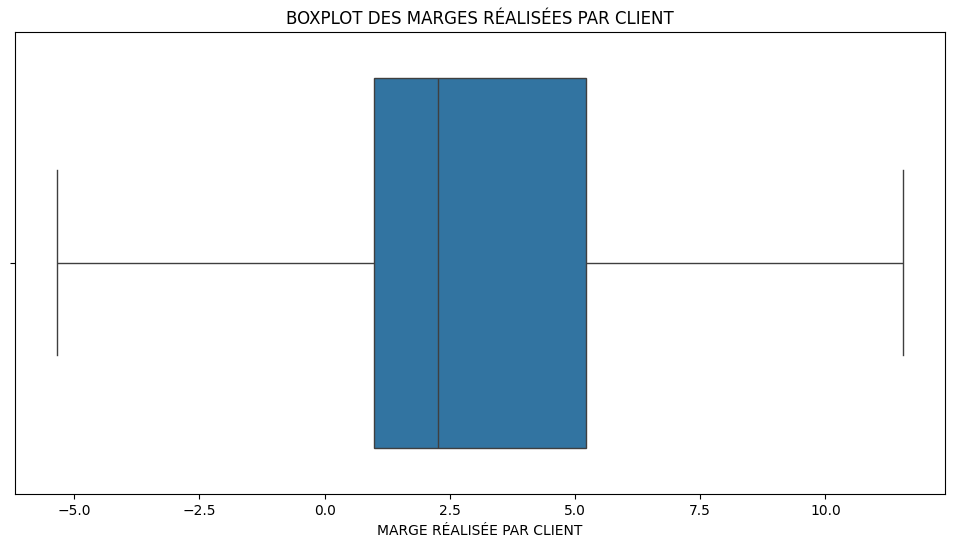

In [32]:
# Visualiser les outliers en utilisant un boxplot avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data4, x='MARGESORTIE')
plt.xlabel('MARGE RÉALISÉE PAR CLIENT')
plt.title("BOXPLOT DES MARGES RÉALISÉES PAR CLIENT")
plt.show()

In [33]:
# Appel à la fonction detect_outliers_iqr() pour obtenir les bornes lower_bound et upper_bound
outliers = detect_outliers_iqr(data4, columns)
lower_bound = outliers[columns].min()
upper_bound = outliers[columns].max()

# Remplacement des outliers par les bornes
data4.loc[:, columns] = data4[columns].clip(lower=lower_bound, upper=upper_bound)

# Afficher le DataFrame avec les outliers corrigés
print(data4)

          MONTANTREMISE  TOTAL  MARGESORTIE
0                0.0000   4.96         2.37
1                0.0000   8.25         3.63
2                0.0000   5.79         3.63
3                0.0000  18.29         6.21
4                0.0000  22.02        10.42
...                 ...    ...          ...
34105700         0.0000   4.69         1.83
34105701         0.0000   3.18         1.00
34105702         0.0000   3.46         1.13
34105703         0.0000   6.80         2.18
34105704         1.1825   1.82         1.42

[34105705 rows x 3 columns]


In [34]:
data4.describe()

,MONTANTREMISE,TOTAL,MARGESORTIE
count,3.410570e+07,3.410570e+07,3.410570e+07
mean,2.790697e-01,7.553460e+00,3.461244e+00
std,4.499037e-01,6.522058e+00,3.454784e+00
min,-7.095000e-01,-8.700000e+00,-5.340000e+00
25%,0.000000e+00,2.820000e+00,9.900000e-01
50%,0.000000e+00,5.210000e+00,2.260000e+00
75%,4.730000e-01,1.050000e+01,5.210000e+00
max,1.182500e+00,2.202000e+01,1.154000e+01


La ligne de code ci-dessous nous permet d'identifier les valeurs en doublons qui conviendra de traiter.

In [35]:
print(data3.duplicated().sum())
data = data3.drop_duplicates()

130


Nous allons désormais procéder au traitement de ces doublons.

In [36]:
data3.drop_duplicates(keep='first', inplace=True)

Code de vérification.

In [37]:
print(data3.duplicated().sum())

0


Nous procédons également à la vérification de présence ou non de valeurs manquantes (aucune valeur détectée).

In [38]:
data3.isnull().sum()

IDTICKET          0
NUMLIGNETICKET    0
IDARTICLE         0
QUANTITE          0
MONTANTREMISE     0
TOTAL             0
MARGESORTIE       0
TOP_RETOUR        0
dtype: int64

Chargement du jeu de données ENTETES TICKET V4.

In [39]:
dataset_path = "C:\\Users\\belga\\OneDrive\\Bureau\\EMBA Big Data\\Module Datascience\\Projet Data Science S2 2024\\ENTETES_TICKET_V4.csv"
data2 = pd.read_csv(dataset_path, sep='|', low_memory=False)
print(data2.shape)
print(list(data2.columns))



(6714173, 5)
['IDTICKET', 'TIC_DATE', 'MAG_CODE', 'IDCLIENT', 'TIC_TOTALTTC']


La ligne de code ci-dessous nous permet de connaître le détail des colonnes ainsi que le type de données constituant notre base (numérique ou caractères).

In [40]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714173 entries, 0 to 6714172
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   IDTICKET      int64  
 1   TIC_DATE      object 
 2   MAG_CODE      object 
 3   IDCLIENT      float64
 4   TIC_TOTALTTC  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 256.1+ MB


Aperçu de notre jeu de données. 

In [41]:
data2

,IDTICKET,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC
0,50100150510,2016-01-02 11:01:33,ALB,2995104.0,"12,9"
1,50100150511,2016-01-02 11:02:10,ALB,1411117.0,"131,06"
2,50100150515,2016-01-02 12:03:27,ALB,222592.0,"34,69"
3,50100150517,2016-01-02 14:23:21,ALB,2979958.0,"97,58"
4,50100150518,2016-01-02 14:26:53,ALB,2858676.0,"4,7"
...,...,...,...,...,...
6714168,1340300014404,2016-12-27 16:31:52,RMA,2292927.0,"59,45"
6714169,1340300014407,2016-12-27 16:35:21,RMA,3189844.0,"26,9"
6714170,1340300014409,2016-12-27 16:38:59,RMA,3125998.0,"22,15"
6714171,1340300014438,2016-12-27 17:17:30,RMA,3252348.0,"118,01"


Afin d'exploiter de façon optimale les informations, nous allons convetir les l'ID TICKET et le NUM LIGNE TICKET en caractère. A l'inverse, nous devons convertir le total TTC en valeur numérique.

In [42]:
data2['IDTICKET'] = data2['IDTICKET'].astype(str)
data2['IDCLIENT'] = data2['IDCLIENT'].astype(str)

In [43]:
data2['TIC_TOTALTTC'] = data2['TIC_TOTALTTC'].str.replace(',', '.')

In [44]:
data2['TIC_TOTALTTC'] = data2['TIC_TOTALTTC'].str.strip('\"')

In [45]:
data2['TIC_TOTALTTC'] = pd.to_numeric(data2['TIC_TOTALTTC'], errors='coerce')

Vérification du traitement.

In [46]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714173 entries, 0 to 6714172
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   IDTICKET      object 
 1   TIC_DATE      object 
 2   MAG_CODE      object 
 3   IDCLIENT      object 
 4   TIC_TOTALTTC  float64
dtypes: float64(1), object(4)
memory usage: 256.1+ MB


In [47]:
data2

,IDTICKET,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC
0,50100150510,2016-01-02 11:01:33,ALB,2995104.0,12.90
1,50100150511,2016-01-02 11:02:10,ALB,1411117.0,131.06
2,50100150515,2016-01-02 12:03:27,ALB,222592.0,34.69
3,50100150517,2016-01-02 14:23:21,ALB,2979958.0,97.58
4,50100150518,2016-01-02 14:26:53,ALB,2858676.0,4.70
...,...,...,...,...,...
6714168,1340300014404,2016-12-27 16:31:52,RMA,2292927.0,59.45
6714169,1340300014407,2016-12-27 16:35:21,RMA,3189844.0,26.90
6714170,1340300014409,2016-12-27 16:38:59,RMA,3125998.0,22.15
6714171,1340300014438,2016-12-27 17:17:30,RMA,3252348.0,118.01


La ligne de code ci-dessous nous permet de formater le format de la date.

In [48]:
from datetime import datetime
data2['TIC_DATE'] = pd.to_datetime(data2['TIC_DATE'], format="%Y-%m-%d %H:%M:%S",errors = 'coerce')
data2['TIC_DATE'] = data2['TIC_DATE'].dt.strftime("%d/%m/%Y")

Vérification du traitement.

In [49]:
data2

,IDTICKET,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC
0,50100150510,02/01/2016,ALB,2995104.0,12.90
1,50100150511,02/01/2016,ALB,1411117.0,131.06
2,50100150515,02/01/2016,ALB,222592.0,34.69
3,50100150517,02/01/2016,ALB,2979958.0,97.58
4,50100150518,02/01/2016,ALB,2858676.0,4.70
...,...,...,...,...,...
6714168,1340300014404,27/12/2016,RMA,2292927.0,59.45
6714169,1340300014407,27/12/2016,RMA,3189844.0,26.90
6714170,1340300014409,27/12/2016,RMA,3125998.0,22.15
6714171,1340300014438,27/12/2016,RMA,3252348.0,118.01


Cette ligne de code nous permet d'identifier le nombre d'occurence de chaque code magasin, pour identifier les éventuels regroupements à effectuer. 

In [50]:
#modalités variables:
data2['MAG_CODE'].value_counts(dropna = False)

MAG_CODE
SSM    246506
MOB    221283
HEI    219713
BEA    205468
GEX    196669
        ...  
CLI     31063
STR     26694
SCH     25502
BAR     18254
SAL     18245
Name: count, Length: 66, dtype: int64

La ligne de code ci-dessous nous permet d'identifier la présence ou non de valeur(s) en doublons.

In [51]:
print(data2.duplicated().sum())
data2 = data2.drop_duplicates()

0


La ligne de code ci-dessous nous permet d'identifier la présence ou non de valeur(s) manquante(s)

In [52]:
pd.DataFrame(index=data2.columns, columns=['%_missing_values'], data= (data2.isna().sum().values / len(data2)*100))

,%_missing_values
IDTICKET,0.0
TIC_DATE,0.0
MAG_CODE,0.0
IDCLIENT,0.0
TIC_TOTALTTC,0.0


CALCUL DU NOMBRES DE MAGASINS (Mag Code) FREQUENTE PAR UN CLIENT (ID Client).

In [53]:
data2['IDCLIENT'] = data2['IDCLIENT'].astype(float)

In [54]:
data2['IDCLIENT'] = data2['IDCLIENT'].astype(int)

In [55]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714173 entries, 0 to 6714172
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   IDTICKET      object 
 1   TIC_DATE      object 
 2   MAG_CODE      object 
 3   IDCLIENT      int32  
 4   TIC_TOTALTTC  float64
dtypes: float64(1), int32(1), object(3)
memory usage: 230.5+ MB


In [56]:

# Calcul de la fréquence et du total des achats par magasin et par client
data2['FREQUENCE_MAG'] = data2.groupby(['MAG_CODE', 'IDCLIENT'])['IDTICKET'].transform('count')

# Afficher le résultat
print(data2.head())

      IDTICKET    TIC_DATE MAG_CODE  IDCLIENT  TIC_TOTALTTC  FREQUENCE_MAG
0  50100150510  02/01/2016      ALB   2995104         12.90             35
1  50100150511  02/01/2016      ALB   1411117        131.06              4
2  50100150515  02/01/2016      ALB    222592         34.69             21
3  50100150517  02/01/2016      ALB   2979958         97.58             28
4  50100150518  02/01/2016      ALB   2858676          4.70             11


In [57]:
data2

,IDTICKET,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC,FREQUENCE_MAG
0,50100150510,02/01/2016,ALB,2995104,12.90,35
1,50100150511,02/01/2016,ALB,1411117,131.06,4
2,50100150515,02/01/2016,ALB,222592,34.69,21
3,50100150517,02/01/2016,ALB,2979958,97.58,28
4,50100150518,02/01/2016,ALB,2858676,4.70,11
...,...,...,...,...,...,...
6714168,1340300014404,27/12/2016,RMA,2292927,59.45,5
6714169,1340300014407,27/12/2016,RMA,3189844,26.90,78
6714170,1340300014409,27/12/2016,RMA,3125998,22.15,31
6714171,1340300014438,27/12/2016,RMA,3252348,118.01,12


In [58]:
data2['FREQUENCE_MAG'].value_counts()

FREQUENCE_MAG
2      276456
3      273510
4      268312
5      258610
1      254447
        ...  
195       195
190       190
181       181
180       180
164       164
Name: count, Length: 253, dtype: int64

In [59]:
data_merged=data3.merge(data2, how='right',left_on='IDTICKET', right_on='IDTICKET')

In [60]:
data_merged

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE,TOP_RETOUR,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC,FREQUENCE_MAG
0,50100150510,1,224168,1.0,0.000,10.75,6.46,0.0,02/01/2016,ALB,2995104,12.90,35
1,50100150511,6,932088,1.0,0.000,6.25,6.25,0.0,02/01/2016,ALB,1411117,131.06,4
2,50100150511,2,397817,1.0,0.625,5.62,2.54,0.0,02/01/2016,ALB,1411117,131.06,4
3,50100150511,5,758445,1.0,3.158,28.42,14.28,0.0,02/01/2016,ALB,1411117,131.06,4
4,50100150511,3,428877,1.0,0.333,2.96,0.94,0.0,02/01/2016,ALB,1411117,131.06,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105921,1340300014438,4,279749,1.0,0.750,6.71,3.08,0.0,27/12/2016,RMA,3252348,118.01,12
34105922,1340300014438,10,287843,4.0,10.950,25.55,10.63,0.0,27/12/2016,RMA,3252348,118.01,12
34105923,1340300014440,2,363834,1.0,0.000,19.95,10.40,0.0,27/12/2016,RMA,3243933,44.80,4
34105924,1340300014440,3,632190,1.0,0.000,19.95,10.49,0.0,27/12/2016,RMA,3243933,44.80,4


In [61]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34105926 entries, 0 to 34105925
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   IDTICKET        object 
 1   NUMLIGNETICKET  object 
 2   IDARTICLE       object 
 3   QUANTITE        float64
 4   MONTANTREMISE   float64
 5   TOTAL           float64
 6   MARGESORTIE     float64
 7   TOP_RETOUR      float64
 8   TIC_DATE        object 
 9   MAG_CODE        object 
 10  IDCLIENT        int32  
 11  TIC_TOTALTTC    float64
 12  FREQUENCE_MAG   int64  
dtypes: float64(6), int32(1), int64(1), object(5)
memory usage: 3.2+ GB


In [62]:
# Calcul de la variété du panier par client
VARIETE_PANIER = data_merged.groupby('IDCLIENT')['IDARTICLE'].nunique().reset_index()
VARIETE_PANIER.columns = ['IDCLIENT', 'VARIETE_PANIER']

# Fusionner la variable de variété du panier avec le DataFrame original
data_merged = data_merged.merge(VARIETE_PANIER, on='IDCLIENT', how='right')

In [63]:
data_merged

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE,TOP_RETOUR,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC,FREQUENCE_MAG,VARIETE_PANIER
0,200200135291,3,33258,1.0,0.000,0.91,0.54,0.0,05/02/2016,IAB,2108,7.57,2,7
1,200200135291,2,33247,1.0,0.000,1.24,0.72,0.0,05/02/2016,IAB,2108,7.57,2,7
2,200200135291,1,227040,1.0,1.782,4.54,1.56,0.0,05/02/2016,IAB,2108,7.57,2,7
3,200500180521,1,312922,1.0,0.545,4.86,2.71,0.0,08/05/2016,IAB,2108,20.58,2,7
4,200500180521,4,932088,1.0,0.000,6.25,6.25,0.0,08/05/2016,IAB,2108,20.58,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105921,770100547217,6,217360,1.0,0.227,2.09,0.32,0.0,31/12/2017,PEG,3517102,55.67,1,10
34105922,770100547217,7,33257,1.0,0.075,0.67,0.39,0.0,31/12/2017,PEG,3517102,55.67,1,10
34105923,770100547217,8,33247,1.0,0.133,1.16,0.64,0.0,31/12/2017,PEG,3517102,55.67,1,10
34105924,770100547217,9,58830,1.0,0.275,2.47,0.85,0.0,31/12/2017,PEG,3517102,55.67,1,10


In [64]:
data_merged['VARIETE_PANIER'].value_counts()

VARIETE_PANIER
27     291932
22     291685
20     291132
24     290634
23     290262
        ...  
588       823
612       761
601       688
471       673
537       661
Name: count, Length: 732, dtype: int64

In [65]:
VARIETE_PANIER = VARIETE_PANIER.astype(int)

In [66]:
# Calculer le montant total de remises par client
TOTAL_REMISE_CLIENT = data_merged.groupby('IDCLIENT')['MONTANTREMISE'].sum()

# Calculer le montant total dépensé par chaque client
TOTAL_DEPENSES = data_merged.groupby('IDCLIENT')['TOTAL'].sum()

# Calculer le taux de remise pour chaque client
TAUX_REMISE = TOTAL_REMISE_CLIENT / TOTAL_DEPENSES
# Nommer la série de taux de remise
TAUX_REMISE.name = 'TAUX_REMISE'

# Fusionner la variable de taux de remise avec le DataFrame original
data_merged = data_merged.merge(TAUX_REMISE, on='IDCLIENT', how='left')

In [81]:
test = data_merged.groupby('IDCLIENT').agg(
    {'MONTANTREMISE' :sum,
     'TOTAL':sum}).reset_index()


C:\Users\belga\AppData\Local\Temp\ipykernel_71744\2006738509.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  test = data_merged.groupby('IDCLIENT').agg(


In [86]:
test.head()

,IDCLIENT,MONTANTREMISE,TOTAL,TAUX_REMISE
0,2108,3.109,24.83,0.125211
1,2119,756.250,6383.37,0.118472
2,2127,22.653,397.72,0.056957
3,2130,100.180,946.36,0.105858
4,2131,95.713,2150.88,0.044499


In [85]:
test["TAUX_REMISE"] = test["MONTANTREMISE"] / test["TOTAL"]


In [79]:
test.head()

,MONTANTREMISE,TOTAL
IDCLIENT,,
2108,3.109,24.83
2119,756.250,6383.37
2127,22.653,397.72
2130,100.180,946.36
2131,95.713,2150.88


In [73]:
TAUX_REMISE.head()

IDCLIENT
2108    0.125211
2119    0.118472
2127    0.056957
2130    0.105858
2131    0.044499
Name: TAUX_REMISE, dtype: float64

In [67]:
data_merged['TAUX_REMISE'].value_counts()

TAUX_REMISE
0.000000    323683
0.013617      5570
0.255264      4729
0.023054      4229
0.013317      4209
             ...  
0.250304         1
0.176282         1
0.333811         1
0.530626         1
0.250030         1
Name: count, Length: 706980, dtype: int64

In [74]:
data_merged.head()

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE,TOP_RETOUR,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC,FREQUENCE_MAG,VARIETE_PANIER,TAUX_REMISE,ANCIENNETE_PRE_CDE,ANCIENNETE_DRE_CDE
0,200200135291,3,33258,1.0,0.000,0.91,0.54,0.0,2016-05-02,IAB,2108,7.57,2,7,0.125211,0.0,95.0
1,200200135291,2,33247,1.0,0.000,1.24,0.72,0.0,2016-05-02,IAB,2108,7.57,2,7,0.125211,0.0,95.0
2,200200135291,1,227040,1.0,1.782,4.54,1.56,0.0,2016-05-02,IAB,2108,7.57,2,7,0.125211,0.0,95.0
3,200500180521,1,312922,1.0,0.545,4.86,2.71,0.0,2016-08-05,IAB,2108,20.58,2,7,0.125211,95.0,0.0
4,200500180521,4,932088,1.0,0.000,6.25,6.25,0.0,2016-08-05,IAB,2108,20.58,2,7,0.125211,95.0,0.0


In [75]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34105926 entries, 0 to 34105925
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   IDTICKET            object        
 1   NUMLIGNETICKET      object        
 2   IDARTICLE           object        
 3   QUANTITE            float64       
 4   MONTANTREMISE       float64       
 5   TOTAL               float64       
 6   MARGESORTIE         float64       
 7   TOP_RETOUR          float64       
 8   TIC_DATE            datetime64[ns]
 9   MAG_CODE            object        
 10  IDCLIENT            int32         
 11  TIC_TOTALTTC        float64       
 12  FREQUENCE_MAG       int64         
 13  VARIETE_PANIER      int64         
 14  TAUX_REMISE         float64       
 15  ANCIENNETE_PRE_CDE  float64       
 16  ANCIENNETE_DRE_CDE  float64       
dtypes: datetime64[ns](1), float64(9), int32(1), int64(2), object(4)
memory usage: 4.2+ GB


In [68]:
missing_dates = data_merged[data_merged['TIC_DATE'].isnull()]
print(missing_dates)

Empty DataFrame
Columns: [IDTICKET, NUMLIGNETICKET, IDARTICLE, QUANTITE, MONTANTREMISE, TOTAL, MARGESORTIE, TOP_RETOUR, TIC_DATE, MAG_CODE, IDCLIENT, TIC_TOTALTTC, FREQUENCE_MAG, VARIETE_PANIER, TAUX_REMISE]
Index: []


In [69]:
unique_dates = data_merged['TIC_DATE'].unique()
print(unique_dates)

['05/02/2016' '08/05/2016' '23/03/2016' '20/04/2016' '26/07/2016'
 '29/04/2016' '21/05/2016' '11/03/2016' '06/05/2016' '07/03/2016'
 '31/08/2016' '16/02/2016' '05/01/2016' '16/06/2017' '15/09/2016'
 '30/03/2017' '03/11/2016' '27/03/2017' '29/03/2017' '27/01/2017'
 '07/02/2016' '28/02/2016' '08/12/2016' '02/04/2017' '09/05/2017'
 '14/09/2017' '28/05/2016' '29/07/2016' '20/06/2017' '29/09/2016'
 '31/03/2017' '04/10/2016' '12/10/2016' '13/04/2017' '14/11/2017'
 '17/03/2016' '23/08/2016' '14/05/2016' '24/03/2016' '04/04/2016'
 '06/08/2016' '19/03/2016' '18/06/2016' '27/08/2016' '29/08/2016'
 '30/04/2016' '01/05/2016' '02/05/2017' '06/10/2016' '05/07/2017'
 '21/12/2017' '21/04/2017' '31/10/2016' '30/04/2017' '19/11/2016'
 '16/09/2017' '13/10/2017' '20/12/2016' '22/03/2016' '21/04/2016'
 '20/05/2016' '02/02/2016' '17/06/2016' '19/02/2016' '24/02/2016'
 '02/03/2016' '28/07/2016' '12/03/2016' '13/04/2016' '10/05/2016'
 '09/06/2016' '16/01/2016' '28/01/2016' '26/08/2016' '07/04/2016'
 '13/05/20

In [70]:
# Convertir la colonne 'TIC_DATE' en format de date
data_merged['TIC_DATE'] = pd.to_datetime(data_merged['TIC_DATE'],errors='coerce')

# Calculer l'ancienneté par rapport à la première commande pour chaque client
data_merged['ANCIENNETE_PRE_CDE'] = data_merged.groupby('IDCLIENT')['TIC_DATE'].transform(lambda x: (x - x.min()).dt.days)

# Calculer l'ancienneté par rapport à la dernière commande pour chaque client
data_merged['ANCIENNETE_DRE_CDE'] = data_merged.groupby('IDCLIENT')['TIC_DATE'].transform(lambda x: (x.max() - x).dt.days)

# Afficher l'ancienneté par rapport à la première et à la dernière commande pour chaque client
print(data_merged[['IDCLIENT', 'TIC_DATE', 'ANCIENNETE_PRE_CDE', 'ANCIENNETE_DRE_CDE']])

          IDCLIENT   TIC_DATE  ANCIENNETE_PRE_CDE  ANCIENNETE_DRE_CDE
0             2108 2016-05-02                 0.0                95.0
1             2108 2016-05-02                 0.0                95.0
2             2108 2016-05-02                 0.0                95.0
3             2108 2016-08-05                95.0                 0.0
4             2108 2016-08-05                95.0                 0.0
...            ...        ...                 ...                 ...
34105921   3517102        NaT                 NaN                 NaN
34105922   3517102        NaT                 NaN                 NaN
34105923   3517102        NaT                 NaN                 NaN
34105924   3517102        NaT                 NaN                 NaN
34105925   3517102        NaT                 NaN                 NaN

[34105926 rows x 4 columns]


In [71]:
data_merged

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE,TOP_RETOUR,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC,FREQUENCE_MAG,VARIETE_PANIER,TAUX_REMISE,ANCIENNETE_PRE_CDE,ANCIENNETE_DRE_CDE
0,200200135291,3,33258,1.0,0.000,0.91,0.54,0.0,2016-05-02,IAB,2108,7.57,2,7,0.125211,0.0,95.0
1,200200135291,2,33247,1.0,0.000,1.24,0.72,0.0,2016-05-02,IAB,2108,7.57,2,7,0.125211,0.0,95.0
2,200200135291,1,227040,1.0,1.782,4.54,1.56,0.0,2016-05-02,IAB,2108,7.57,2,7,0.125211,0.0,95.0
3,200500180521,1,312922,1.0,0.545,4.86,2.71,0.0,2016-08-05,IAB,2108,20.58,2,7,0.125211,95.0,0.0
4,200500180521,4,932088,1.0,0.000,6.25,6.25,0.0,2016-08-05,IAB,2108,20.58,2,7,0.125211,95.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105921,770100547217,6,217360,1.0,0.227,2.09,0.32,0.0,NaT,PEG,3517102,55.67,1,10,0.096505,NaN,NaN
34105922,770100547217,7,33257,1.0,0.075,0.67,0.39,0.0,NaT,PEG,3517102,55.67,1,10,0.096505,NaN,NaN
34105923,770100547217,8,33247,1.0,0.133,1.16,0.64,0.0,NaT,PEG,3517102,55.67,1,10,0.096505,NaN,NaN
34105924,770100547217,9,58830,1.0,0.275,2.47,0.85,0.0,NaT,PEG,3517102,55.67,1,10,0.096505,NaN,NaN


In [72]:
TICKETS = "C:\\Users\\belga\\OneDrive\\Bureau\\EMBA Big Data\\Module Datascience\\Projet Data Science S2 2024\\TICKETS_NET.pkl"
data_merged.to_pickle(TICKETS)
